In [1]:
import requests as req
import json
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
now = int(datetime.datetime.now().timestamp())

yesterday = int(datetime.datetime.now().timestamp()) - 608400

def hit_api(coin):
    return req.get('https://api.coingecko.com/api/v3/coins/' + coin + '/market_chart/range?vs_currency=usd&from=' + str(yesterday) + '&to=' + str(now))

In [3]:
polk = hit_api('polkadot')
ana = hit_api('solana')

In [4]:
def convert_json(resp):
    return json.loads(resp.text)

In [5]:
pdot = convert_json(polk)
sola = convert_json(ana)

In [6]:
def add_dt(json):
    data = []

    for i in json['prices']:

        temp = [datetime.datetime.fromtimestamp(int(i[0]/1000)), i[1]]

        data.append(temp)

    return data

In [7]:
dot = add_dt(pdot)
sol = add_dt(sola)

In [8]:
def make_df(data):
    total_df = pd.DataFrame(data, columns=['date', 'price'])

    total_df['MA4'] = total_df['price'].rolling(4).mean()
    
    total_df['MAday'] = total_df['price'].rolling(24).mean()

    total_df = total_df.set_index('date')

    return total_df

In [9]:
dot_df = make_df(dot)
sol_df = make_df(sol)

In [10]:
dot_df.tail()

,price,MA4,MAday
date,,,
2021-07-10 07:01:01,15.278362,15.375218,15.560946
2021-07-10 08:01:41,15.351458,15.388177,15.547754
2021-07-10 09:00:16,15.348492,15.352742,15.532057
2021-07-10 10:01:01,15.645253,15.405891,15.531318
2021-07-10 11:01:19,15.254213,15.399854,15.519515


In [11]:
sol_df.tail()

,price,MA4,MAday
date,,,
2021-07-10 07:01:05,32.682458,33.029086,33.466931
2021-07-10 08:01:44,32.530529,32.860565,33.391681
2021-07-10 09:00:39,32.429558,32.722861,33.321455
2021-07-10 10:01:29,32.798954,32.610375,33.284336
2021-07-10 11:01:36,31.961876,32.430229,33.207833


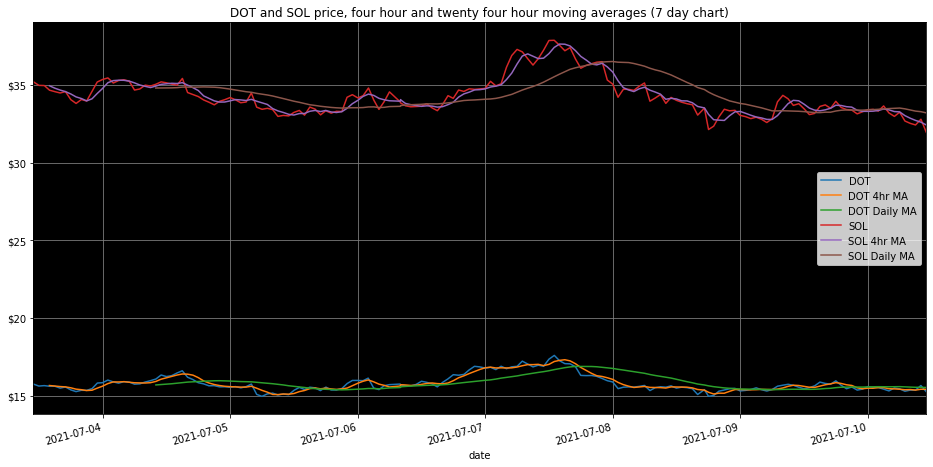

In [12]:
ax = plt.axes()
ax.set_facecolor("black")

dot_df['price'].plot(label='DOT', figsize=[16,8], title = 'DOT and SOL price, four hour and twenty four hour moving averages (7 day chart)')
dot_df['MA4'].plot(label='DOT 4hr MA')
dot_df['MAday'].plot(label='DOT Daily MA')
sol_df['price'].plot(label='SOL')
sol_df['MA4'].plot(label='SOL 4hr MA')
sol_df['MAday'].plot(label='SOL Daily MA')
plt.legend()
plt.xticks(rotation=15)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.grid(True, color='gray')
plt.savefig('DOTSOLdaily.png')